In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [2]:
cifar_train=np.load("../input/cisc6000-deep-learning-hw2/cifar.train.npy")
cifar_test=np.load("../input/cisc6000-deep-learning-hw2/cifar.test.npy")
cifar_train_label=np.load("../input/cisc6000-deep-learning-hw2/cifar.trainlabel.npy")
cifar_test_loabel=pd.read_csv("../input/cisc6000-deep-learning-hw2/cifar.testlabel.csv")

In [3]:
cifar_train1=cifar_train.reshape((48000,32,32,3))

In [4]:
cifar_train1.shape

(48000, 32, 32, 3)

In [5]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

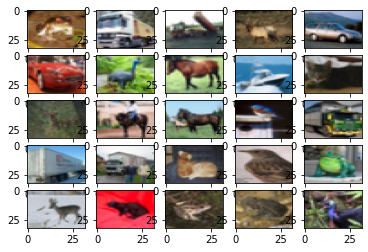

In [69]:
fig, ax = plt.subplots(5, 5)
k = 0 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [7]:
x1, x_val, y1, y_val = train_test_split(x_train,y_train, test_size=0.20)

## Building the model

Your model will have 3 convolutional layers
- Number of filters for the convolutional layers are 16, 32, 48 respectively
- Maxpooling (2 x 2) following the first two convolutional layers
- Two fully connected layers of size 500 and 10 respectively
- Padding = same, kernel size = 3, stride = 1.
- Training: epoch = 80, batch size = 128, learning rate = 0.001, optimizer = Adam,
activation = ReLU

In [71]:
x1.shape

(40000, 32, 32, 3)

In [8]:
i = Input(shape=(32,32,3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(500, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

2022-10-26 14:48:45.307421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 14:48:45.308386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 14:48:45.463241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 14:48:45.464155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 14:48:45.464958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [9]:
model_base = Model(i, x)
model_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 48)          13872     
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0     

In [10]:
model_base.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
checkpoint_filepath = "checkpoint1"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [76]:
x.shape

TensorShape([None, 10])

In [12]:
 r=model_base.fit(
  x1,y1,validation_data=(x_val,y_val),batch_size=128,epochs=80,callbacks=[model_checkpoint_callback])

2022-10-26 14:49:21.315013: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2022-10-26 14:49:23.302222: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


313/313 [==============================] - 12s 7ms/step - loss: 1.5732 - accuracy: 0.4363 - val_loss: 1.2953 - val_accuracy: 0.5430
Epoch 2/80
313/313 [==============================] - 2s 5ms/step - loss: 1.1877 - accuracy: 0.5779 - val_loss: 1.1757 - val_accuracy: 0.5871
Epoch 3/80
313/313 [==============================] - 2s 5ms/step - loss: 1.0246 - accuracy: 0.6385 - val_loss: 1.0883 - val_accuracy: 0.6144
Epoch 4/80
313/313 [==============================] - 2s 5ms/step - loss: 0.9043 - accuracy: 0.6790 - val_loss: 0.9762 - val_accuracy: 0.6580
Epoch 5/80
313/313 [==============================] - 2s 5ms/step - loss: 0.7947 - accuracy: 0.7219 - val_loss: 0.9677 - val_accuracy: 0.6620
Epoch 6/80
313/313 [==============================] - 2s 7ms/step - loss: 0.6957 - accuracy: 0.7571 - val_loss: 0.9040 - val_accuracy: 0.6867
Epoch 7/80
313/313 [==============================] - 2s 5ms/step - loss: 0.5908 - accuracy: 0.7964 - val_loss: 0.9161 - val_accuracy: 0.6919
Epoch 8/80
313/3

In [16]:
val=r.history

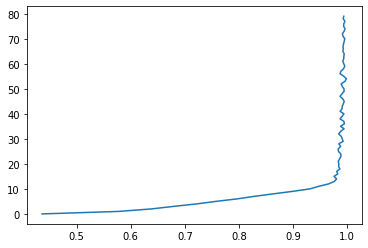

In [18]:
plt.plot(val['accuracy'],np.arange(0,80,1))

In [20]:
y_pred=model_base.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

    airplane     0.7107    0.7420    0.7260      1000
  automobile     0.7495    0.8080    0.7777      1000
        bird     0.5116    0.6620    0.5772      1000
         cat     0.5266    0.4060    0.4585      1000
        deer     0.6389    0.6140    0.6262      1000
         dog     0.5889    0.5630    0.5757      1000
        frog     0.6864    0.7880    0.7337      1000
       horse     0.7816    0.6870    0.7312      1000
        ship     0.8144    0.7810    0.7973      1000
       truck     0.7736    0.7040    0.7372      1000

    accuracy                         0.6755     10000
   macro avg     0.6782    0.6755    0.6741     10000
weighted avg     0.6782    0.6755    0.6741     10000



**Build a new model Mbatch by adding batch normalization to your baseline model
Mbase. Train your model with the same parameters specified in (b) and save the best
model.**
- Plot the learning curves of Mbase and Mbatch in one graph.
- Fill in Row #2 in Table 1.

In [27]:
i = Input(shape=(32,32,3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(500, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [28]:
model_batch = Model(i, x)
model_batch.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 48)          1387

In [30]:
model_batch.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
r1 = model_batch.fit(
  x1,y1,validation_data=(x_val,y_val),batch_size=128,epochs=80,callbacks=[model_checkpoint_callback])

Epoch 1/80
313/313 [==============================] - 3s 9ms/step - loss: 1.3990 - accuracy: 0.5034 - val_loss: 1.5625 - val_accuracy: 0.5445
Epoch 2/80
313/313 [==============================] - 2s 6ms/step - loss: 0.9927 - accuracy: 0.6469 - val_loss: 1.1533 - val_accuracy: 0.5930
Epoch 3/80
313/313 [==============================] - 2s 5ms/step - loss: 0.8110 - accuracy: 0.7151 - val_loss: 0.8961 - val_accuracy: 0.6902
Epoch 4/80
313/313 [==============================] - 2s 5ms/step - loss: 0.6542 - accuracy: 0.7714 - val_loss: 1.0106 - val_accuracy: 0.6635
Epoch 5/80
313/313 [==============================] - 2s 5ms/step - loss: 0.5121 - accuracy: 0.8195 - val_loss: 0.9911 - val_accuracy: 0.6776
Epoch 6/80
313/313 [==============================] - 2s 5ms/step - loss: 0.3742 - accuracy: 0.8691 - val_loss: 1.1483 - val_accuracy: 0.6723
Epoch 7/80
313/313 [==============================] - 2s 5ms/step - loss: 0.2492 - accuracy: 0.9155 - val_loss: 1.3779 - val_accuracy: 0.6592
Epoch 

In [32]:
y_pred=model_batch.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

    airplane     0.6458    0.7440    0.6914      1000
  automobile     0.8205    0.7450    0.7809      1000
        bird     0.5108    0.6160    0.5585      1000
         cat     0.4773    0.4520    0.4643      1000
        deer     0.5870    0.6070    0.5969      1000
         dog     0.5892    0.4360    0.5011      1000
        frog     0.7201    0.7230    0.7216      1000
       horse     0.7098    0.7290    0.7193      1000
        ship     0.7900    0.7750    0.7824      1000
       truck     0.7333    0.7340    0.7336      1000

    accuracy                         0.6561     10000
   macro avg     0.6584    0.6561    0.6550     10000
weighted avg     0.6584    0.6561    0.6550     10000



**Adding Dropout**

In [33]:
i = Input(shape=(32,32,3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

In [34]:
model_drop=Model(i, x)
model_drop.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 48)          13872     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0   

In [35]:
model_drop.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
r2 = model_drop.fit(
  x1,y1,validation_data=(x_val,y_val),batch_size=128,epochs=80,callbacks=[model_checkpoint_callback])

Epoch 1/80
313/313 [==============================] - 3s 7ms/step - loss: 1.5312 - accuracy: 0.4460 - val_loss: 1.2489 - val_accuracy: 0.5683
Epoch 2/80
313/313 [==============================] - 2s 5ms/step - loss: 1.1735 - accuracy: 0.5836 - val_loss: 1.1279 - val_accuracy: 0.6137
Epoch 3/80
313/313 [==============================] - 2s 5ms/step - loss: 1.0033 - accuracy: 0.6480 - val_loss: 0.9630 - val_accuracy: 0.6626
Epoch 4/80
313/313 [==============================] - 2s 5ms/step - loss: 0.8881 - accuracy: 0.6861 - val_loss: 0.8916 - val_accuracy: 0.6903
Epoch 5/80
313/313 [==============================] - 2s 5ms/step - loss: 0.7959 - accuracy: 0.7230 - val_loss: 0.8886 - val_accuracy: 0.6920
Epoch 6/80
313/313 [==============================] - 2s 5ms/step - loss: 0.7075 - accuracy: 0.7531 - val_loss: 0.8376 - val_accuracy: 0.7100
Epoch 7/80
313/313 [==============================] - 2s 5ms/step - loss: 0.6208 - accuracy: 0.7833 - val_loss: 0.8342 - val_accuracy: 0.7162
Epoch 

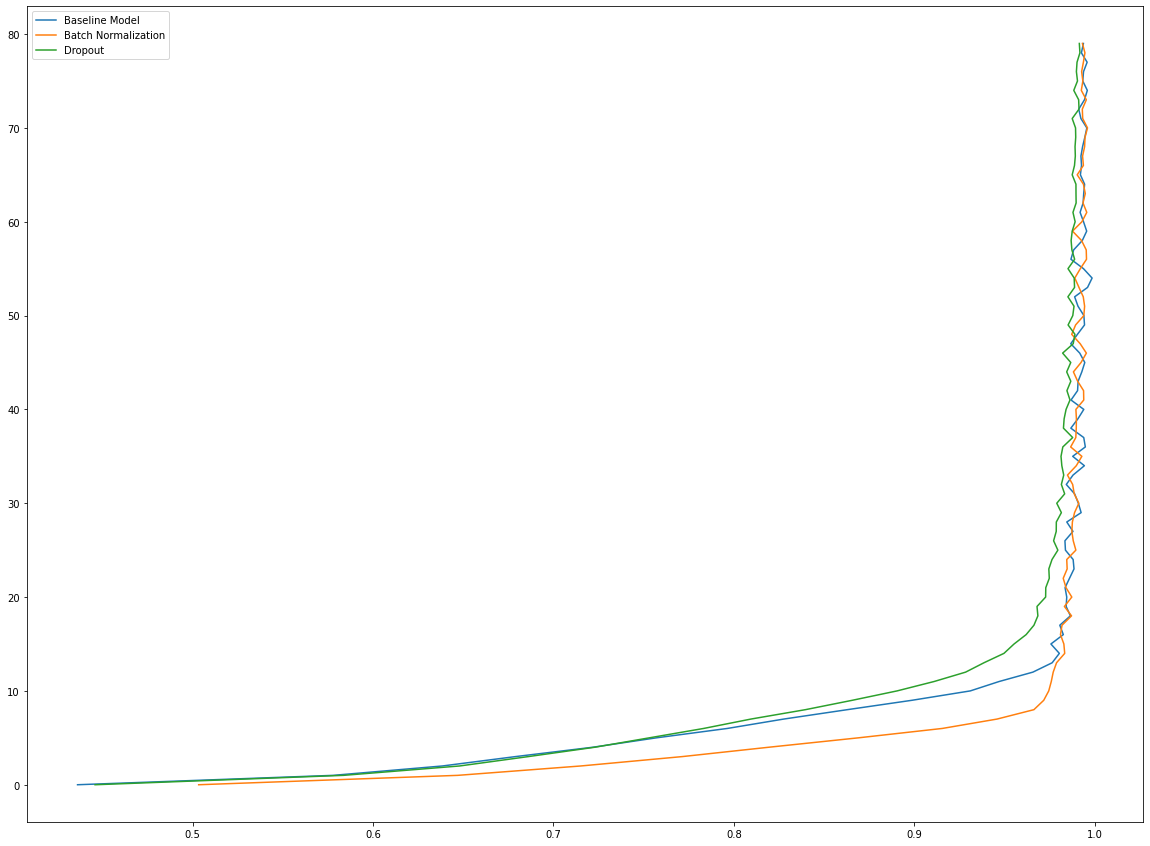

In [48]:
plt.figure(figsize=(20,15))
plt.plot(r.history['accuracy'],np.arange(0,80,1),label="Baseline Model")
plt.plot(r1.history['accuracy'],np.arange(0,80,1),label="Batch Normalization")
plt.plot(r2.history['accuracy'],np.arange(0,80,1),label="Dropout")
plt.legend()
plt.show()

In [37]:
y_pred=model_drop.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

    airplane     0.7612    0.7300    0.7453      1000
  automobile     0.8250    0.8250    0.8250      1000
        bird     0.5950    0.6640    0.6276      1000
         cat     0.5042    0.5420    0.5224      1000
        deer     0.6528    0.6580    0.6554      1000
         dog     0.5736    0.6000    0.5865      1000
        frog     0.8113    0.7310    0.7691      1000
       horse     0.8146    0.7250    0.7672      1000
        ship     0.8019    0.8260    0.8138      1000
       truck     0.7887    0.7690    0.7787      1000

    accuracy                         0.7070     10000
   macro avg     0.7128    0.7070    0.7091     10000
weighted avg     0.7128    0.7070    0.7091     10000



**Adding both dropout and batch normalization**

In [38]:
i = Input(shape=(32,32,3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

In [39]:
model_drop_batch =Model(i, x)
model_drop_batch.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 48)          1387

In [40]:
model_drop_batch.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
r3=model_drop_batch.fit(
  x1,y1,validation_data=(x_val,y_val),batch_size=128,epochs=80,callbacks=[model_checkpoint_callback])

Epoch 1/80
313/313 [==============================] - 3s 7ms/step - loss: 1.3438 - accuracy: 0.5224 - val_loss: 1.5495 - val_accuracy: 0.5885
Epoch 2/80
313/313 [==============================] - 2s 5ms/step - loss: 0.9619 - accuracy: 0.6625 - val_loss: 1.1215 - val_accuracy: 0.6024
Epoch 3/80
313/313 [==============================] - 2s 6ms/step - loss: 0.7731 - accuracy: 0.7290 - val_loss: 1.1059 - val_accuracy: 0.6364
Epoch 4/80
313/313 [==============================] - 2s 5ms/step - loss: 0.6298 - accuracy: 0.7800 - val_loss: 0.9628 - val_accuracy: 0.6828
Epoch 5/80
313/313 [==============================] - 2s 6ms/step - loss: 0.4973 - accuracy: 0.8273 - val_loss: 0.8983 - val_accuracy: 0.6971
Epoch 6/80
313/313 [==============================] - 2s 5ms/step - loss: 0.3703 - accuracy: 0.8723 - val_loss: 1.2768 - val_accuracy: 0.6376
Epoch 7/80
313/313 [==============================] - 2s 5ms/step - loss: 0.2740 - accuracy: 0.9049 - val_loss: 1.1608 - val_accuracy: 0.6817
Epoch 

In [42]:
y_pred=model_drop_batch.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

    airplane     0.7654    0.7310    0.7478      1000
  automobile     0.8471    0.8200    0.8333      1000
        bird     0.5819    0.6040    0.5927      1000
         cat     0.5273    0.4740    0.4992      1000
        deer     0.6917    0.6080    0.6472      1000
         dog     0.5916    0.5910    0.5913      1000
        frog     0.6024    0.8710    0.7122      1000
       horse     0.7624    0.7510    0.7567      1000
        ship     0.8277    0.8120    0.8198      1000
       truck     0.8435    0.7170    0.7751      1000

    accuracy                         0.6979     10000
   macro avg     0.7041    0.6979    0.6975     10000
weighted avg     0.7041    0.6979    0.6975     10000



**Plotting all together**

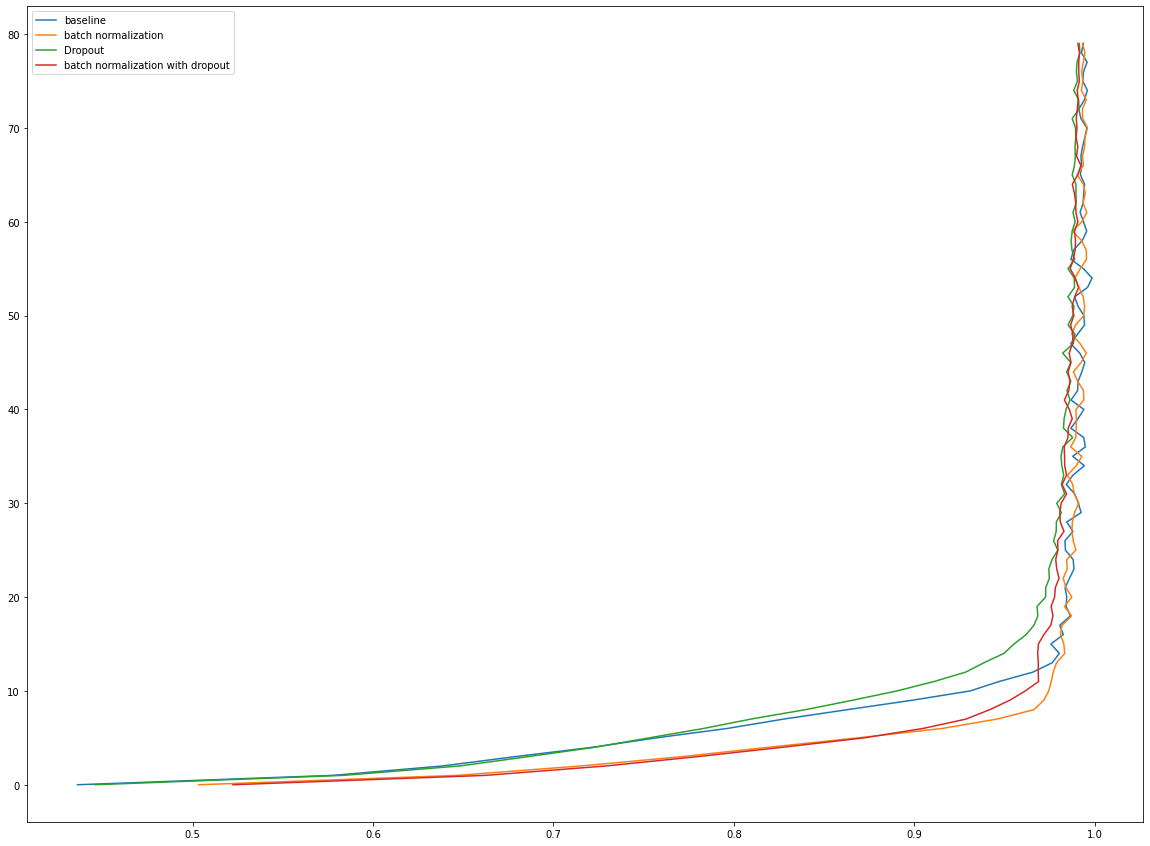

In [47]:
plt.figure(figsize=(20,15))
plt.plot(r.history['accuracy'],np.arange(0,80,1),label="Baseline Model")
plt.plot(r1.history['accuracy'],np.arange(0,80,1),label="Batch Normalization")
plt.plot(r2.history['accuracy'],np.arange(0,80,1),label="Dropout")
plt.plot(r3.history['accuracy'],np.arange(0,80,1),label="batch normalization with Dropout")
plt.legend()
plt.show()

# Section 2

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.layers.merge import concatenate

In [ ]:
        img = cv2.imread("../input/cisc6000-deep-learning-hw2/train_noisy_data/image_00005.png")
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img=img.reshape(64,64,1)
        img=img/255

In [ ]:
img

In [ ]:
im1=cv2.threshold(img, 0.5,1, cv2.THRESH_BINARY)[1]

In [ ]:
im1.shape

In [ ]:
plt.imshow(im1)

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img=img.reshape(64,64,1)
        img=img/255.0
        if img is not None:
            images.append(img)
    return np.asarray(images)

In [ ]:
test_clean=load_images_from_folder("../input/cisc6000-deep-learning-hw2/test_clean_data")
test_noisy=load_images_from_folder("../input/cisc6000-deep-learning-hw2/test_noisy_data")
train_clean=load_images_from_folder("../input/cisc6000-deep-learning-hw2/train_clean_data")
train_noisy= load_images_from_folder("../input/cisc6000-deep-learning-hw2/train_noisy_data")

In [ ]:
# test_clean,test_noisy,train_clean,train_noisy = test_clean/255.0 ,test_noisy/255.0,train_clean/255.0,train_noisy/255.0

In [ ]:
def get_plot(images):
    n = 10  # how many records we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
get_plot(train_clean)

In [ ]:
get_plot(train_noisy)

Making the model for autencoder

In [ ]:
input_img = Input(shape=(64, 64, 1))  

# Conv1 
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 
x = Conv2D(filters = 24, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 
x = Conv2D(filters = 32,kernel_size =(3, 3),activation='relu',padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


In [ ]:
# Decoding


# DeConv1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

In [ ]:
r3= autoencoder.fit(train_noisy, train_clean,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(test_noisy, test_clean)
               )

In [ ]:
r3.history['loss']

In [ ]:
test_img_noisy=test_noisy[100:110]
test_img_cleaned=test_clean[100:110]

In [ ]:
result=autoencoder.predict(test_img_noisy)

In [ ]:
test_img_noisy.shape

In [ ]:
def get_plot1(images,title1):
    n = 10  # how many records we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.gray()
        plt.title(title1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
get_plot1(test_img_noisy,"Dirty")
get_plot1(test_img_cleaned,"Latent")
get_plot1(result,"Cleaned")

To demonstrate the efficacy of an AE model, we have trained a classification model M
on clean MNIST images of the same input dimension as those in this exercise. Weights
for M are provided in the file (VI) M_weights_hdf5.
i. Loading the pre-train weights into model M and apply M to data in
(III) test_clean_data.zip and (IV) test_noisy_data.zip respectively. Fill in
the first two corresponding rows in Table 2.
ii. Create a new integrated model such that the output of AE will be the input to M.
Apply this new model to (III) test_clean_data.zip and (IV) test_noisy_data.zip
again, and fill in the corresponding rows in Table 2.

In [ ]:
classifier=tf.keras.models.load_model('../input/cisc6000-deep-learning-hw2/M.weights.hdf5')

In [ ]:
classifier.summary()

In [ ]:
max(classifier.predict(test_img_cleaned)[9])

In [ ]:
np.argmax(classifier.predict(test_img_cleaned)[8])

In [ ]:
plt.imshow(test_img_cleaned[8])

In [ ]:
def get_plot_classify(images):
    n = 10  # how many records we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.gray()
        plt.title(f"predicted : {np.argmax(classifier.predict(images)[i])} \n confidence : {max(classifier.predict(images)[9])} ")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
round(0.66,4)

In [ ]:
get_plot_classify(test_img_cleaned)

In [ ]:
get_plot_classify(test_img_noisy)

In [ ]:
classifier

In [ ]:
def get_both(images):
    cleaned=autoencoder.predict(images)
    output_digit= classifier.predict(cleaned)
    return output_digit
    
    

In [ ]:
final_result_cleaned=get_both(test_img_cleaned)

In [ ]:
final_result_cleaned.shape

In [ ]:
final_result_noisy=get_both(test_img_noisy)